In [1]:
# source: https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

Seven ways to handling missing data:
1. Delete rows that contain the NaN
2. Fill the NaN with Mean/Median
3. Fill the NaN with Mean/Median based on the category
4. Other Filling Method
5. Using support missing value algorithms
6. Predict the missing value by interpolation as example
7. Using Datawig (Deep Learning LIbrary)

# 1. Delete rows that contain the NaN

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/imdwipayana/DATA/main/Data%20Titanic/train.csv')

<AxesSubplot:>

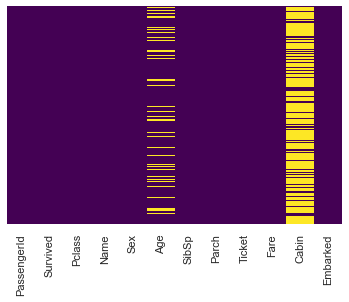

In [4]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data_drop = data.copy()

In [7]:
data_drop.dropna(inplace=True)

In [8]:
data_drop.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
data_drop.shape

(183, 12)

In [11]:
#Pro:
# After the drop, data could create the robus model
#Cons:
# Loss abundance information
# Will produce poor testing score if the missing value is a lot.

# 2. Fill the NaN with Mean/Median

In [12]:
data_replace = data.copy()

In [13]:
data_replace['Age'] = data_replace['Age'].replace(np.NaN,data_replace['Age'].mean())

In [14]:
data_replace.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
data_replace.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
#Pros:
# Prevent loss information from data by deleting the row contains the NaN
# Excellent for small dataset and easy to implement
#Cons:
# Working just for numerical data
# causing data leakage ????

# 3. Fill the NaN with Mean/Median based on the category

In [18]:
# look on my data analysis for Titanic the moderat one: https://github.com/imdwipayana/Titanic-Data-Analysis/blob/main/Titanic_Moderate.ipynb

# 4. Other Filling Method

In [19]:
data_fill = data.copy()

In [20]:
#LOCF Method- Last Observation Carried Forward
data_fill['Age'] = data['Age'].fillna(method='ffill')

In [21]:
data_fill.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.00000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.58156,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.55459,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.42000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.00000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.00000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.00000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.00000,8.000000,6.000000,512.329200


In [22]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
data_filling = data.copy()

In [24]:
data_filling['Age'] = data['Age'].interpolate(method='linear', limit_direction='forward',axis=0)

In [25]:
data_filling.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.726061,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.902353,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.500000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 6. Predict the missing value by interpolation as example

In [26]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
data_regression = data[['Survived','Pclass','Sex','SibSp','Parch','Fare','Age']]

In [28]:
data_regression['Sex'] = [1 if x=='male' else 0 for x in data_regression['Sex']]

C:\Users\ekadw\AppData\Local\Temp/ipykernel_10548/2452086473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_regression['Sex'] = [1 if x=='male' else 0 for x in data_regression['Sex']]


In [29]:
data_regression.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age
0,0,3,1,1,0,7.2500,22.0
1,1,1,0,1,0,71.2833,38.0
2,1,3,0,0,0,7.9250,26.0
3,1,1,0,1,0,53.1000,35.0
4,0,3,1,0,0,8.0500,35.0


In [30]:
test_data = data_regression[data_regression['Age'].isnull()]

In [31]:
test_data

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age
5,0,3,1,0,0,8.4583,NaN
17,1,2,1,0,0,13.0000,NaN
19,1,3,0,0,0,7.2250,NaN
26,0,3,1,0,0,7.2250,NaN
28,1,3,0,0,0,7.8792,NaN
...,...,...,...,...,...,...,...
859,0,3,1,0,0,7.2292,NaN
863,0,3,0,8,2,69.5500,NaN
868,0,3,1,0,0,9.5000,NaN
878,0,3,1,0,0,7.8958,NaN


In [32]:
data_regression.dropna(inplace=True)

C:\Users\ekadw\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [33]:
data_regression.shape

(714, 7)

In [34]:
y_train = data_regression['Age']
X_train = data_regression.drop('Age',axis=1)
X_test = test_data.drop('Age', axis=1)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
model = LinearRegression()

In [37]:
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [38]:
y_pred

array([29.07080066, 30.10833306, 22.44685065, 29.08927347, 22.43705181,
       29.07922599, 32.43692984, 22.43898701, 22.15615704, 29.07922599,
       29.07691632, 24.96460346, 22.43898701, 20.8713251 , 37.80993305,
       44.85950626, 17.21443083, 29.07922599, 29.07691632, 22.43842532,
       29.07691632, 29.07691632, 29.07922599, 22.14798185, 18.1926178 ,
       29.07691632, 29.08140983, 17.39852793, 27.61791252, 29.08796287,
       29.06774208, -5.49189866, 36.98755908, 44.88640441, 15.9929439 ,
       -5.20126796, 37.01068094, 44.52580031, 18.32218064, 29.08140983,
       22.43898701, -5.49189866, 25.08068578, 29.07922599, 16.2835746 ,
       29.37503621, 25.27089854, 18.32218064, 29.08889901, 37.44600929,
       29.08140983, 29.37204054, 44.81038921, 22.43898701, 37.23610531,
       44.88528103, 44.85950626, 37.88482487, 22.43898701, 13.91474356,
       30.40869971, 29.07691632, 36.97144531, -5.49189866, 14.20537427,
       32.62971335, 29.07922599, 18.31319362, 44.75047576, 29.08

In [39]:
# Be carefull with negative values after the interpolation

# 7. Using Datawig (Deep Learning LIbrary)

In [40]:
# Install datawig library first
pip3 install datawig

SyntaxError: invalid syntax (Temp/ipykernel_10548/511646887.py, line 2)

In [41]:
import datawig

ModuleNotFoundError: No module named 'datawig'